In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Checking if i have GPU Enabled
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
 # 2 very important preprocessing is Resizing and Rescaling
batch_size = 32

In [ ]:
training_datagenarator= ImageDataGenerator(rescale=1./255,horizontal_flip=True,
    vertical_flip=True,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2,validation_split=0.1)

test_datagen= ImageDataGenerator(rescale=1./255,horizontal_flip=True,
    vertical_flip=True,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2)

#training_datagenarator

In [ ]:
# dividing the data into training and validation
train=training_datagenarator.flow_from_directory('/content/gdrive/MyDrive/DisasterModel/train', target_size=(224, 224),color_mode='rgb', class_mode='categorical', batch_size=batch_size,subset='training')

validation=training_datagenarator.flow_from_directory('/content/gdrive/MyDrive/DisasterModel/train', target_size=(224, 224),color_mode='rgb', class_mode='categorical', batch_size=batch_size,subset='validation')

test = test_datagen.flow_from_directory('/content/gdrive/MyDrive/DisasterModel/test', target_size=(224, 224),color_mode='rgb', class_mode='categorical', batch_size=batch_size,shuffle=False)

In [ ]:
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization

In [ ]:
# Initializing CNN
cnn=tf.keras.models.Sequential()

# adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(Dropout(0.25))
# adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(Dropout(0.25))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(Dropout(0.25))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))
cnn.add(Dropout(0.25))

# adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=1))
cnn.add(Dropout(0.25))

# Flattening
cnn.add(tf.keras.layers.Flatten())
#cnn.add(tf.keras.layers.Dropout(0.3))
cnn.add(Dropout(0.5))
# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))
cnn.add(BatchNormalization())
# Output layers
cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        3

In [ ]:
from keras.callbacks import EarlyStopping 

checkpoint=tf.keras.callbacks.ModelCheckpoint('/content/gdrive/MyDrive/output/multi-model3.h5',
                                           monitor='val_loss',mode="min",save_best_only = True)
# simple early stopping
#es = EarlyStopping(monitor='val_loss', mode='max', verbose=1)

In [ ]:
callbacks=checkpoint

In [ ]:
cnn.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

cnn.fit(train,validation_data=validation,epochs=100,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
        callbacks=callbacks
                 )

Epoch 1/100
47/90 [==============>...............] - ETA: 16:57 - loss: 2.0244 - accuracy: 0.3335

In [ ]:
from tensorflow.keras.models import load_model
cnn=load_model('/content/gdrive/MyDrive/output/multi-model.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL


In [ ]:
image_for_testing=r'/content/gdrive/My Drive/DisasterModel/test/wildfire/829.jpg'

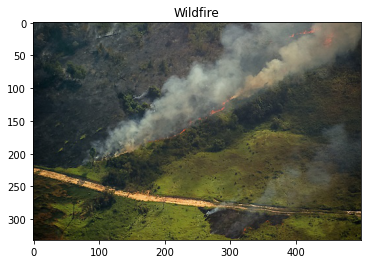

In [ ]:
test_image=image.load_img(image_for_testing,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=cnn.predict(test_image)

Catagories=['Cyclone','Earthquake','Flood','Wildfire']

image_show=PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(Catagories[int(np.argmax(result))])
plt.show()

In [ ]:
kpred = cnn.predict(test)

In [ ]:
pred = kpred.tolist()
predictions = []
for i in pred:
  predictions.append(i.index(max(i)))

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
print(classification_report(test.classes,predictions))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       100
           1       0.91      0.94      0.93       100
           2       0.91      0.89      0.90       100
           3       0.92      0.84      0.88       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [ ]:
cf_matrix=confusion_matrix(test.classes,predictions)
cf_matrix

array([[94,  0,  1,  5],
       [ 1, 94,  4,  1],
       [ 2,  8, 89,  1],
       [11,  1,  4, 84]])

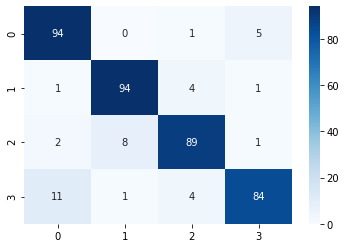

In [ ]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True,cmap='Blues')

In [ ]:
m = test.classes.tolist()

In [ ]:
m,n = cnn.evaluate(test)

13/13 [==============================] - 12s 925ms/step - loss: 0.2630 - accuracy: 0.9050


In [ ]:
m,n = cnn.evaluate(train)

90/90 [==============================] - 95s 1s/step - loss: 0.1913 - accuracy: 0.9344


In [ ]:
m,n = cnn.evaluate(validation)

10/10 [==============================] - 12s 1s/step - loss: 0.2249 - accuracy: 0.9312
